In [1]:
import pandas as pd
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
import seaborn as sns

/Users/chada/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Features vs. target (E_form under I-rich condition)

In [2]:
data_0 = pd.read_csv('feature for doping on Sn-site-I-rich.csv')
data_0

,Unnamed: 0,EN,EA,1st IE,2nd IE,3rd IE,X,D,M,AR,...,u (IR) 100%,OS,HF (exp),HF (cal),S,HV,Ef (q=0) eV,Ef (q=+1) eV,CT,Unnamed: 22
0,Sc,0.694,0.169,0.893,0.875,0.812,0.798,0.4,0.379,1.269,...,0.339,1.5,2.966,2.486,2.613,1.097,1.095,-0.184,1.280,NaN
1,Y,0.622,0.276,0.847,0.836,0.673,0.772,0.6,0.749,1.462,...,0.409,1.5,3.215,2.953,1.373,1.310,1.360,-0.196,1.556,NaN
2,Zr,0.679,0.383,0.903,0.900,0.754,0.835,0.9,0.768,1.421,...,0.327,2.0,2.032,2.209,1.281,2.000,1.596,0.288,1.308,NaN
3,As,1.112,0.727,1.336,1.274,0.929,1.256,0.8,0.631,0.786,...,0.264,2.5,0.304,0.552,1.512,0.112,0.842,0.384,0.457,NaN
4,Sb,1.046,0.962,1.177,1.130,0.829,1.149,0.9,1.026,0.917,...,0.345,2.5,0.501,0.846,0.954,0.234,0.897,0.137,0.759,NaN
5,Bi,1.031,0.850,0.992,1.140,0.831,0.973,1.3,1.760,0.986,...,0.468,2.5,0.785,1.074,0.562,0.552,0.430,-0.034,0.464,NaN
6,Al,0.821,0.396,0.787,1.287,0.933,0.735,0.4,0.227,0.814,...,0.243,1.5,1.612,1.656,4.166,1.010,1.028,-0.047,1.075,NaN
7,Ca,0.510,0.022,0.832,0.811,1.669,0.726,0.2,0.338,1.338,...,0.455,1.0,3.722,3.732,2.908,0.534,0.039,0.309,-0.270,NaN
8,Ga,0.923,0.269,0.817,1.402,1.007,0.745,0.8,0.587,0.938,...,0.282,1.5,1.137,1.460,1.710,0.883,0.904,0.279,0.625,NaN
9,In,0.908,0.269,0.788,1.290,0.919,0.720,1.0,0.967,1.076,...,0.364,1.5,1.412,1.586,1.074,0.793,0.493,0.094,0.399,NaN


In [3]:
data_1 = data_0.drop(columns=['Unnamed: 0', 'Unnamed: 22'])
stat_1 = stats.zscore(data_1)

In [4]:
data_1.var()

EN              0.037505
EA              0.383333
1st IE          0.025581
2nd IE          0.035122
3rd IE          0.154735
X               0.029198
D               0.362609
M               0.174025
AR              0.036792
CR              0.009117
IR              0.017190
t (AR) 100%     0.011617
u (IR) 100%     0.004934
OS              0.505435
HF (exp)        0.941089
HF (cal)        0.648610
S               1.076727
HV              0.466490
Ef (q=0) eV     0.346518
Ef (q=+1) eV    0.096615
CT              0.498048
dtype: float64

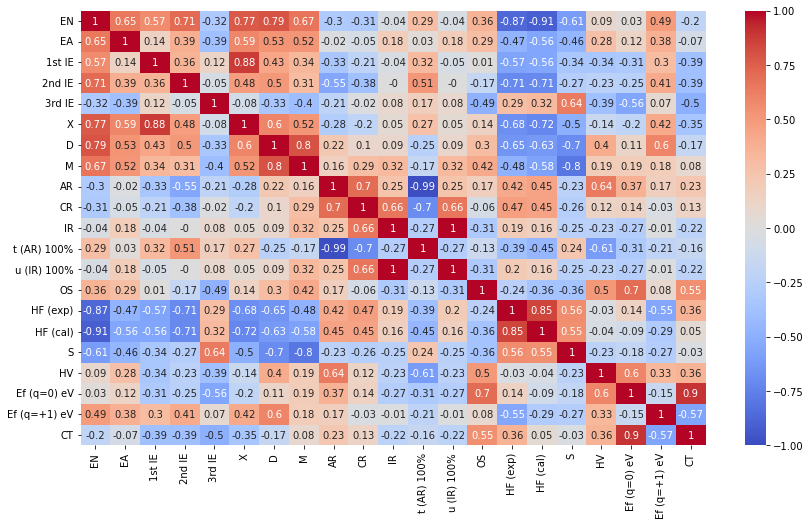

In [5]:
corr_1 = stat_1.corr().round(2)
plt.figure(figsize=(14,8))
sns.heatmap(corr_1, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
#plt.savefig('corr_1.jpeg', format='jpeg', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
data_2 = data_1.drop(columns=['EN', 'X', 'M', 'AR', 'CR', 'IR', 'HF (cal)'])
display (data_2)

,EA,1st IE,2nd IE,3rd IE,D,t (AR) 100%,u (IR) 100%,OS,HF (exp),S,HV,Ef (q=0) eV,Ef (q=+1) eV,CT
0,0.169,0.893,0.875,0.812,0.4,0.977,0.339,1.5,2.966,2.613,1.097,1.095,-0.184,1.280
1,0.276,0.847,0.836,0.673,0.6,0.893,0.409,1.5,3.215,1.373,1.310,1.360,-0.196,1.556
2,0.383,0.903,0.900,0.754,0.9,0.910,0.327,2.0,2.032,1.281,2.000,1.596,0.288,1.308
3,0.727,1.336,1.274,0.929,0.8,1.275,0.264,2.5,0.304,1.512,0.112,0.842,0.384,0.457
4,0.962,1.177,1.130,0.829,0.9,1.178,0.345,2.5,0.501,0.954,0.234,0.897,0.137,0.759
5,0.850,0.992,1.140,0.831,1.3,1.132,0.468,2.5,0.785,0.562,0.552,0.430,-0.034,0.464
6,0.396,0.787,1.287,0.933,0.4,1.253,0.243,1.5,1.612,4.166,1.010,1.028,-0.047,1.075
7,0.022,0.832,0.811,1.669,0.2,0.945,0.455,1.0,3.722,2.908,0.534,0.039,0.309,-0.270
8,0.269,0.817,1.402,1.007,0.8,1.163,0.282,1.5,1.137,1.710,0.883,0.904,0.279,0.625
9,0.269,0.788,1.290,0.919,1.0,1.078,0.364,1.5,1.412,1.074,0.793,0.493,0.094,0.399


In [7]:
stat_2 = stats.zscore(data_2)

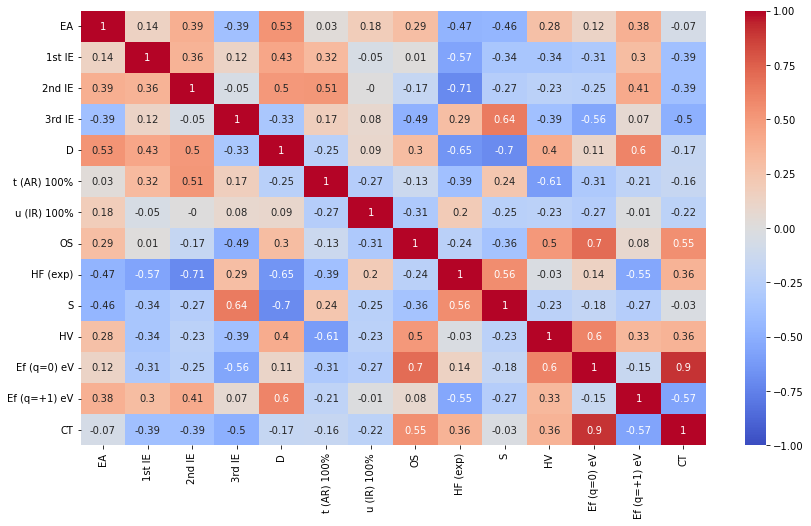

In [8]:
corr_2 = stat_2.corr().round(2)
plt.figure(figsize=(14,8))
sns.heatmap(corr_2, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
#plt.savefig('corr_2.jpeg', format='jpeg', dpi=300, bbox_inches='tight')
plt.show()

# Features vs. target (E_form under I-poor condition)

In [9]:
data_3 = pd.read_csv('feature for doping on Sn-site-I-poor.csv')
data_3

,Unnamed: 0,EN,EA,1st IE,2nd IE,3rd IE,X,D,M,AR,...,t (AR) 100%,u (IR) 100%,OS,HF (exp),HF (cal),S,HV,Ef (q=0) eV,Ef (q=+1) eV,CT
0,Sc,0.694,0.169,0.893,0.875,0.812,0.798,0.4,0.379,1.269,...,0.977,0.339,1.5,2.966,2.486,2.613,1.097,0.725,-0.554,1.280
1,Y,0.622,0.276,0.847,0.836,0.673,0.772,0.6,0.749,1.462,...,0.893,0.409,1.5,3.215,2.953,1.373,1.310,0.990,-0.566,1.556
2,Zr,0.679,0.383,0.903,0.900,0.754,0.835,0.9,0.768,1.421,...,0.910,0.327,2.0,2.032,2.209,1.281,2.000,0.936,-0.372,1.308
3,As,1.112,0.727,1.336,1.274,0.929,1.256,0.8,0.631,0.786,...,1.275,0.264,2.5,0.304,0.552,1.512,0.112,1.342,0.884,0.457
4,Sb,1.046,0.962,1.177,1.130,0.829,1.149,0.9,1.026,0.917,...,1.178,0.345,2.5,0.501,0.846,0.954,0.234,1.237,0.477,0.759
5,Bi,1.031,0.850,0.992,1.140,0.831,0.973,1.3,1.760,0.986,...,1.132,0.468,2.5,0.785,1.074,0.562,0.552,0.240,-0.224,0.464
6,Al,0.821,0.396,0.787,1.287,0.933,0.735,0.4,0.227,0.814,...,1.253,0.243,1.5,1.612,1.656,4.166,1.010,0.658,-0.417,1.075
7,Ca,0.510,0.022,0.832,0.811,1.669,0.726,0.2,0.338,1.338,...,0.945,0.455,1.0,3.722,3.732,2.908,0.534,-0.041,0.229,-0.270
8,Ga,0.923,0.269,0.817,1.402,1.007,0.745,0.8,0.587,0.938,...,1.163,0.282,1.5,1.137,1.460,1.710,0.883,0.534,-0.091,0.625
9,In,0.908,0.269,0.788,1.290,0.919,0.720,1.0,0.967,1.076,...,1.078,0.364,1.5,1.412,1.586,1.074,0.793,0.123,-0.276,0.399


In [10]:
data_4 = data_3.drop(columns=['Unnamed: 0'])
stat_4 = stats.zscore(data_4)

In [11]:
data_4.var()

EN              0.037505
EA              0.383333
1st IE          0.025581
2nd IE          0.035122
3rd IE          0.154735
X               0.029198
D               0.362609
M               0.174025
AR              0.036792
CR              0.009117
IR              0.017190
t (AR) 100%     0.011617
u (IR) 100%     0.004934
OS              0.505435
HF (exp)        0.941089
HF (cal)        0.648610
S               1.076727
HV              0.466490
Ef (q=0) eV     0.420913
Ef (q=+1) eV    0.262341
CT              0.498048
dtype: float64

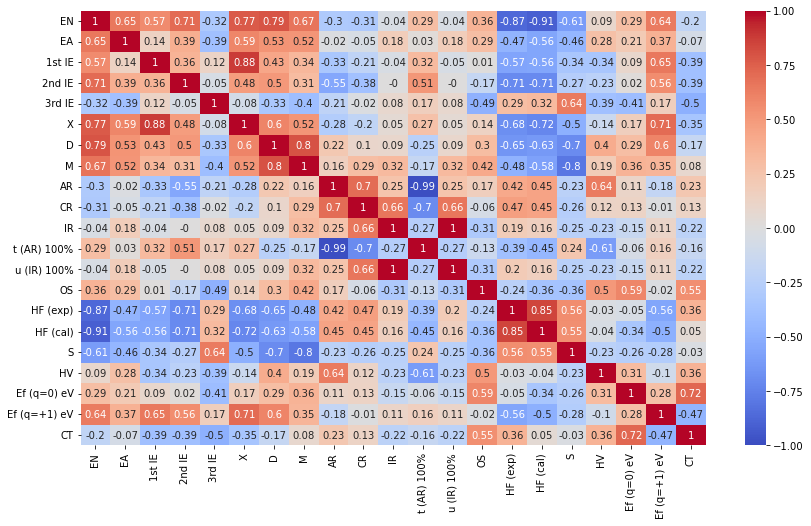

In [12]:
corr_3 = stat_4.corr().round(2)
plt.figure(figsize=(14,8))
sns.heatmap(corr_3, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
#plt.savefig('corr_3.jpeg', format='jpeg', dpi=300, bbox_inches='tight')
plt.show()

In [13]:
data_5 = data_4.drop(columns=['EN', 'X', 'M', 'AR', 'CR', 'IR', 'HF (cal)'])
display (data_5)

,EA,1st IE,2nd IE,3rd IE,D,t (AR) 100%,u (IR) 100%,OS,HF (exp),S,HV,Ef (q=0) eV,Ef (q=+1) eV,CT
0,0.169,0.893,0.875,0.812,0.4,0.977,0.339,1.5,2.966,2.613,1.097,0.725,-0.554,1.280
1,0.276,0.847,0.836,0.673,0.6,0.893,0.409,1.5,3.215,1.373,1.310,0.990,-0.566,1.556
2,0.383,0.903,0.900,0.754,0.9,0.910,0.327,2.0,2.032,1.281,2.000,0.936,-0.372,1.308
3,0.727,1.336,1.274,0.929,0.8,1.275,0.264,2.5,0.304,1.512,0.112,1.342,0.884,0.457
4,0.962,1.177,1.130,0.829,0.9,1.178,0.345,2.5,0.501,0.954,0.234,1.237,0.477,0.759
5,0.850,0.992,1.140,0.831,1.3,1.132,0.468,2.5,0.785,0.562,0.552,0.240,-0.224,0.464
6,0.396,0.787,1.287,0.933,0.4,1.253,0.243,1.5,1.612,4.166,1.010,0.658,-0.417,1.075
7,0.022,0.832,0.811,1.669,0.2,0.945,0.455,1.0,3.722,2.908,0.534,-0.041,0.229,-0.270
8,0.269,0.817,1.402,1.007,0.8,1.163,0.282,1.5,1.137,1.710,0.883,0.534,-0.091,0.625
9,0.269,0.788,1.290,0.919,1.0,1.078,0.364,1.5,1.412,1.074,0.793,0.123,-0.276,0.399


In [14]:
stat_5 = stats.zscore(data_5)

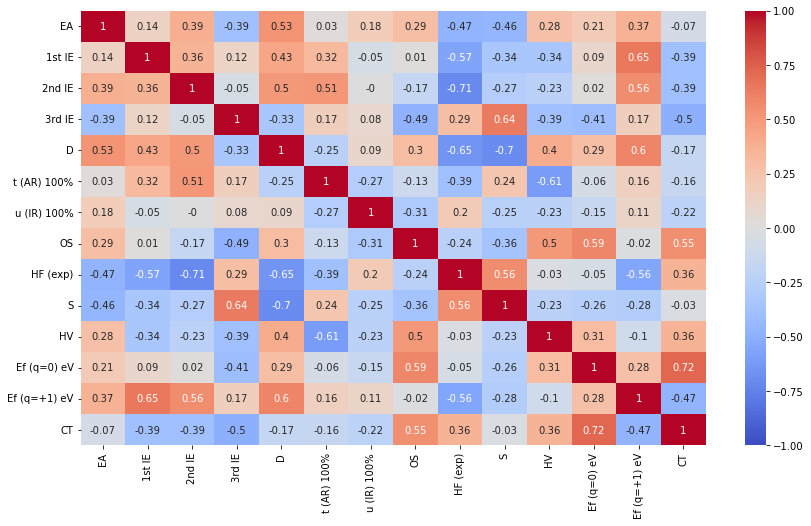

In [15]:
corr_4 = stat_5.corr().round(2)
plt.figure(figsize=(14,8))
sns.heatmap(corr_4, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
#plt.savefig('corr_4.jpeg', format='jpeg', dpi=300, bbox_inches='tight')
plt.show()